In [1]:
!pip install -e ..

Obtaining file:///C:/Users/Sepehr/Desktop/Master/Programming_Data_Science/Git/pds21/pds21
  Attempting uninstall: yellowcab
    Found existing installation: yellowcab 0.0.1.dev1
    Uninstalling yellowcab-0.0.1.dev1:
      Successfully uninstalled yellowcab-0.0.1.dev1
  Running setup.py develop for yellowcab


In [2]:
from yellowcab.io.input import read_parquet_dataset
from yellowcab.model import fare_amount_hyper_parameter_optimization,build_fare_amount_model_optimized,trip_distance_regression_base
import numpy as np

In [3]:
%%time
cab_df = read_parquet_dataset(relative_path="input/cleaned")


Wall time: 19.9 s


In [3]:
%%time
cab_df = cab_df.sample(frac=0.05,random_state=7)
fare_amount_hyper_parameter_optimization(cab_df)


Predicted target: fare_amount, model name: xgb_fare_amount_model, prediction type: regression
Running grid search for xgb_fare_amount_model based on neg_mean_absolute_error
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best neg_mean_absolute_error Score was: -0.29220388393437574
The best hyper parameters for xgb_fare_amount_model are:
{'xgb_fare_amount_model__learning_rate': 0.1, 'xgb_fare_amount_model__max_depth': 10, 'xgb_fare_amount_model__min_child_weight': 1, 'xgb_fare_amount_model__n_estimators': 80, 'xgb_fare_amount_model__reg_lambda': 10}
Wall time: 13min 14s


In [4]:
%%time
cab_df = cab_df.sample(frac=0.1,random_state=7)
build_fare_amount_model_optimized(cab_df)


Predicted target: fare_amount, model name: xgb_model_fare_amount_optimized, prediction type: regression
-------MODEL SCORES-------
MAE:  0.293
MSE:  1.062
RMSE:  1.031
R2:  97.839 %
Wall time: 2min



Predicted target: trip_distance, model name: xg_boost, prediction type: regression
10 features were selected for prediction from the original 502 features.


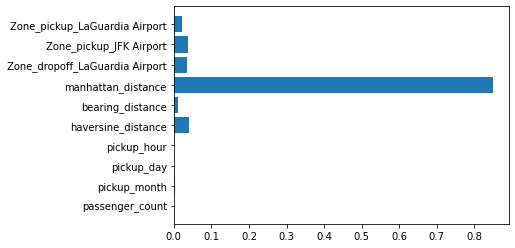

-------MODEL SCORES-------
MAE:  0.393
MSE:  0.395
RMSE:  0.629
R2:  93.037 %
Wall time: 2min 22s


In [4]:
%%time
cab_df = cab_df.sample(frac=0.05,random_state=7)
trip_distance_regression_base(cab_df)